# Implementation of Interpolation Methods

### Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure 
import matplotlib.pyplot as plt 

### Read The Data

Be able to try interpolation techniques; a certain amount of the data should be removed. The dataset is shown below before and after the removal process.

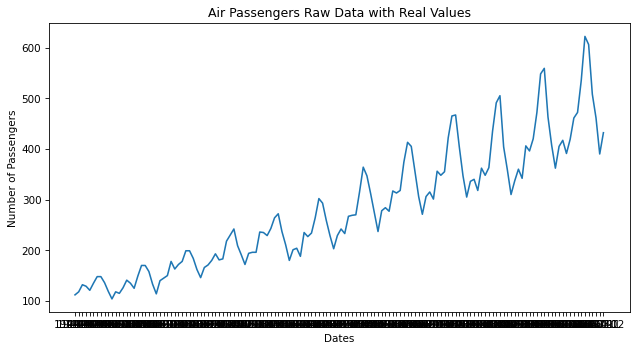

In [2]:
passenger = pd.read_csv(r'AirPassengers.csv')
passenger = passenger.rename(columns={'Month': 'Date', '#Passengers': 'Passengers'})

 
figure(figsize=(10, 5), dpi=75, linewidth=10) 
plt.plot(passenger['Date'], passenger['Passengers']) 
plt.title('Air Passengers Raw Data with Real Values') 
plt.xlabel('Dates', fontsize=10) 
plt.ylabel('Number of Passengers', fontsize=10) 
plt.show()

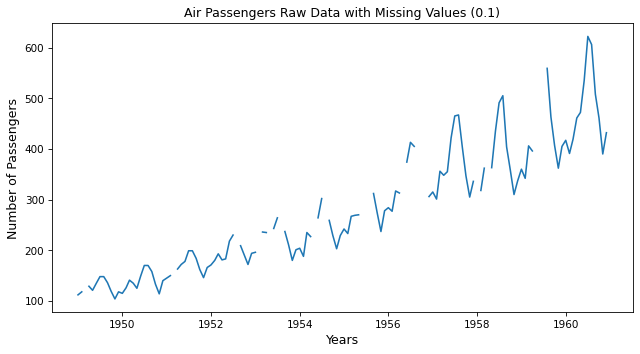

In [3]:
# Convert date into data-time format
passenger['Date'] = pd.to_datetime(passenger['Date'])  
passenger.sort_values(by=['Date'], inplace=True, ascending=True)

# Remove some of the data randomly
passenger['Passengers_01'] = passenger['Passengers'].mask(np.random.rand(len(passenger)) < 0.1)
passenger['Passengers_03'] = passenger['Passengers'].mask(np.random.rand(len(passenger)) < 0.3)

figure(figsize=(10, 5), dpi=75, linewidth=10) 
plt.plot(passenger['Date'], passenger['Passengers_01']) 
plt.title('Air Passengers Raw Data with Missing Values (0.1)') 
plt.xlabel('Years', fontsize=12) 
plt.ylabel('Number of Passengers', fontsize=12) 
plt.show()

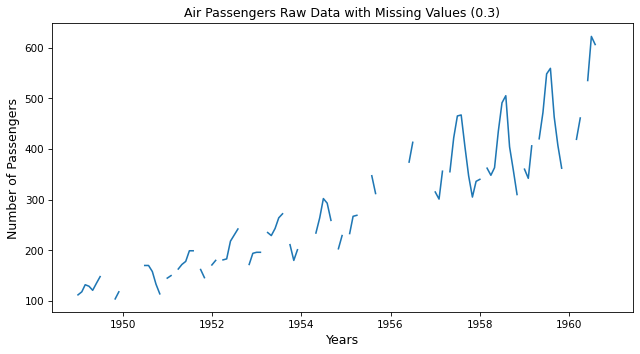

In [4]:
figure(figsize=(10, 5), dpi=75, linewidth=10) 
plt.plot(passenger['Date'], passenger['Passengers_03']) 
plt.title('Air Passengers Raw Data with Missing Values (0.3)') 
plt.xlabel('Years', fontsize=12) 
plt.ylabel('Number of Passengers', fontsize=12) 
plt.show()

### Interpolation Techniques

1. Linear interpolation
2. Padding
3. Quadratic
4. Polynomial
5. Piecewise Polynomial
6. Spline
7. Krogh
8. Akima

In [5]:
# Apply the interpolation methods to the dataset which 10% percentage is missing
passenger['Linear_01'] = passenger['Passengers_01'].interpolate(method='linear')
passenger['Padding_01'] = passenger['Passengers_01'].interpolate(method='pad')
passenger['Quadratic_01'] = passenger['Passengers_01'].interpolate(method='quadratic')
passenger['Polynomial_01'] = passenger['Passengers_01'].interpolate(method='polynomial', order=2)
passenger['PiecewisePolynomial_01'] = passenger['Passengers_01'].interpolate(method='piecewise_polynomial')
passenger['Spline_01'] = passenger['Passengers_01'].interpolate(method='spline', order=2)
passenger['Pchip_01'] = passenger['Passengers_01'].interpolate(method='pchip')
passenger['Akima_01'] = passenger['Passengers_01'].interpolate(method='akima')

# Apply the interpolation methods to the dataset which 30% percentage is missing
passenger['Linear_03'] = passenger['Passengers_03'].interpolate(method='linear')
passenger['Padding_03'] = passenger['Passengers_03'].interpolate(method='pad')
passenger['Quadratic_03'] = passenger['Passengers_03'].interpolate(method='quadratic')
passenger['Polynomial_03'] = passenger['Passengers_03'].interpolate(method='polynomial', order=2)
passenger['PiecewisePolynomial_03'] = passenger['Passengers_03'].interpolate(method='piecewise_polynomial')
passenger['Spline_03'] = passenger['Passengers_03'].interpolate(method='spline', order=2)
passenger['Pchip_03'] = passenger['Passengers_03'].interpolate(method='pchip')
passenger['Akima_03'] = passenger['Passengers_03'].interpolate(method='akima')

C:\Users\yukse\AppData\Local\Temp\ipykernel_24104\2524384929.py:3: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  passenger['Padding_01'] = passenger['Passengers_01'].interpolate(method='pad')
C:\Users\yukse\AppData\Local\Temp\ipykernel_24104\2524384929.py:13: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  passenger['Padding_03'] = passenger['Passengers_03'].interpolate(method='pad')


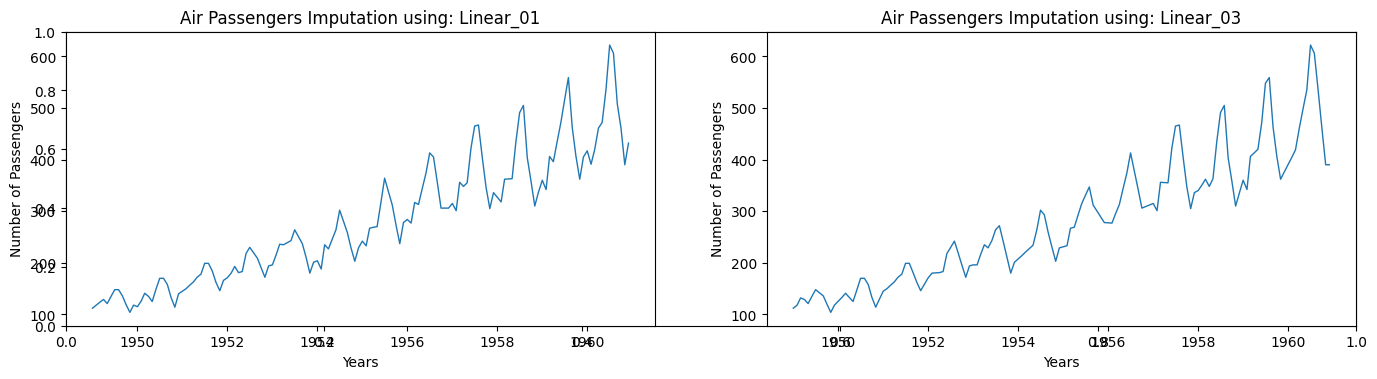

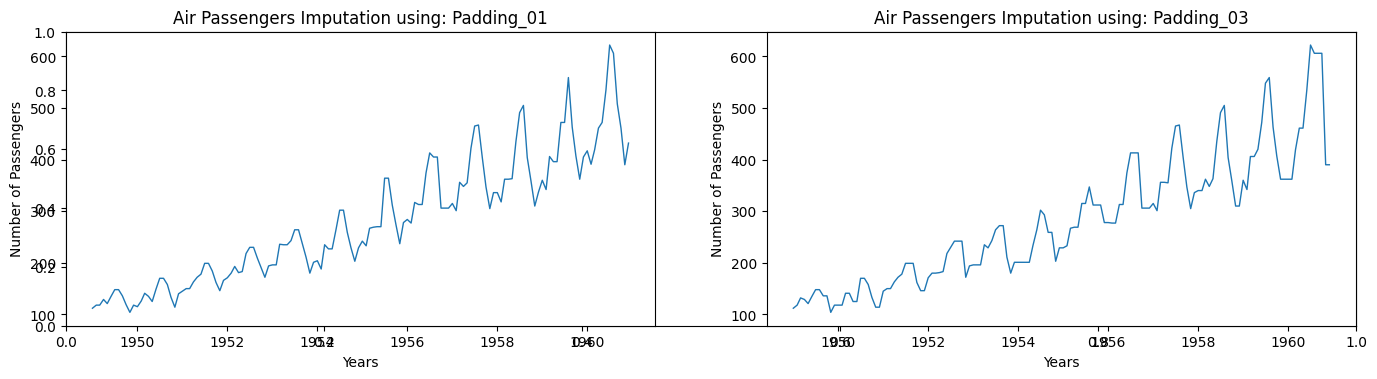

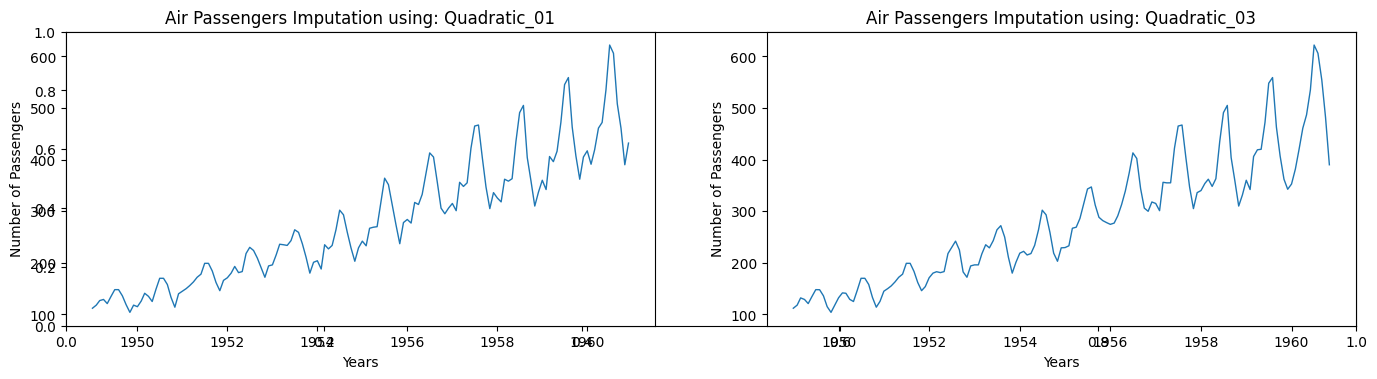

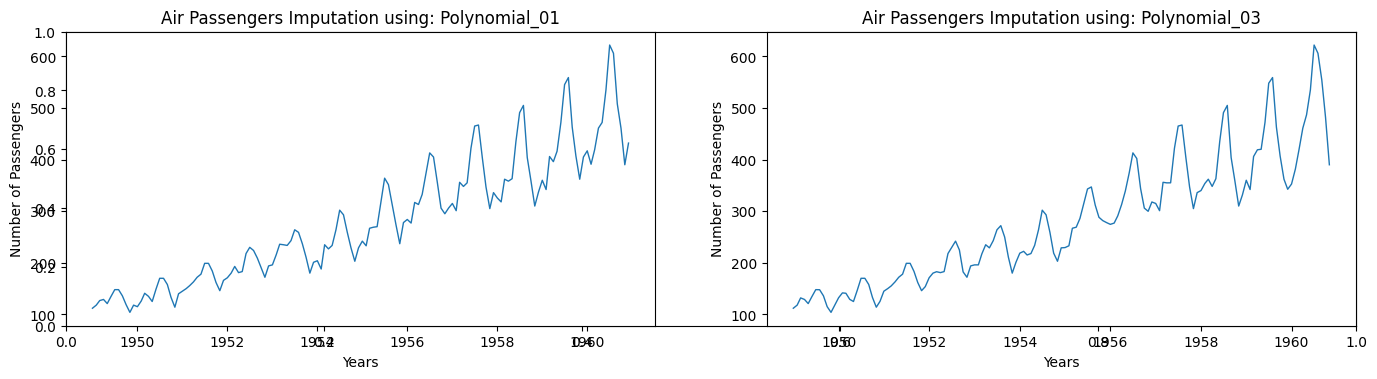

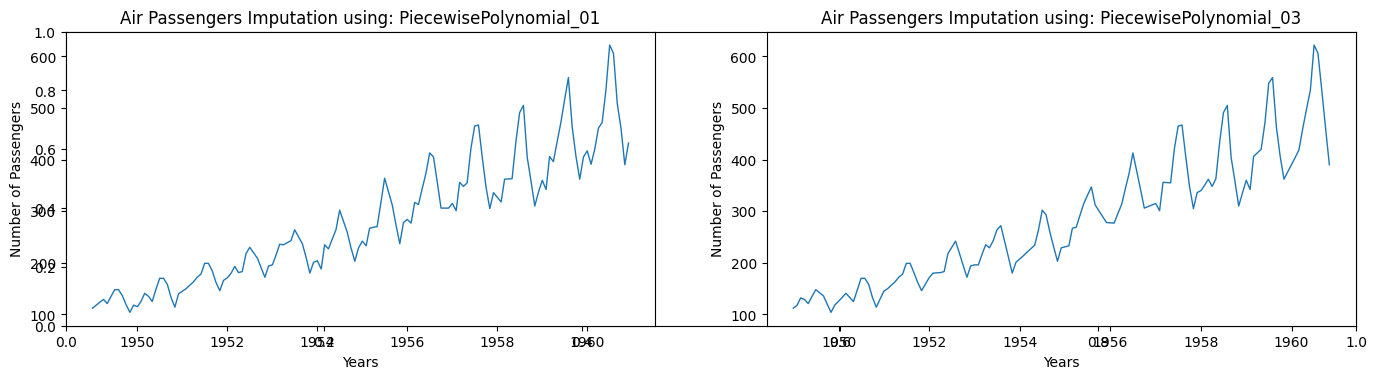

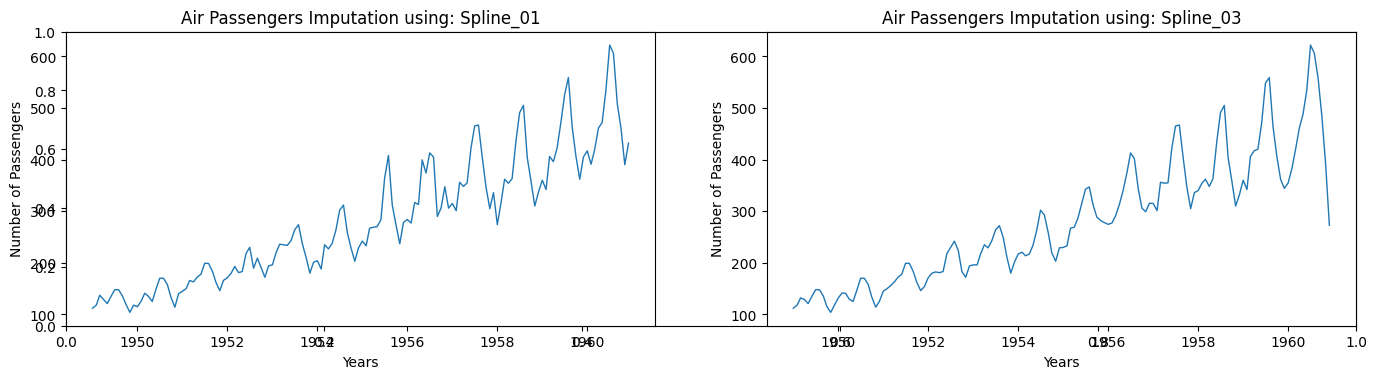

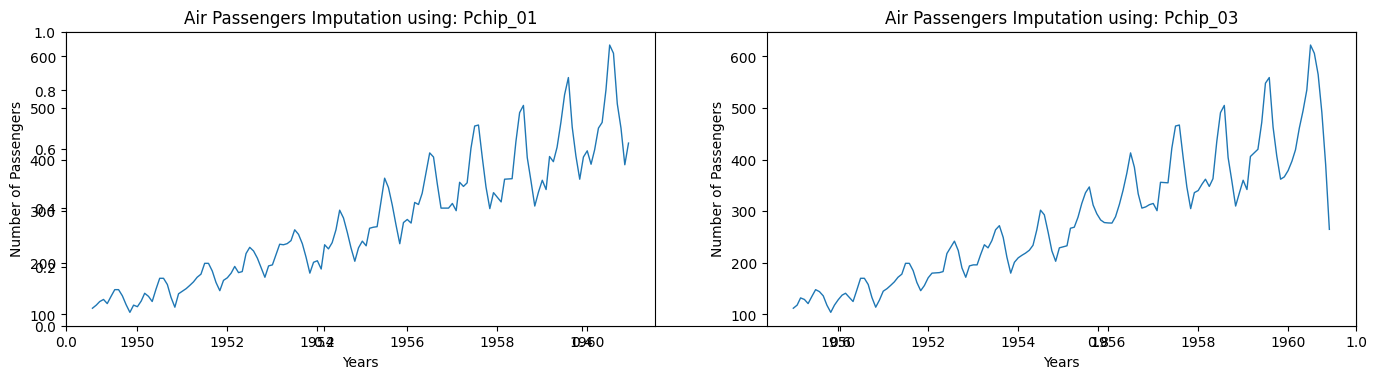

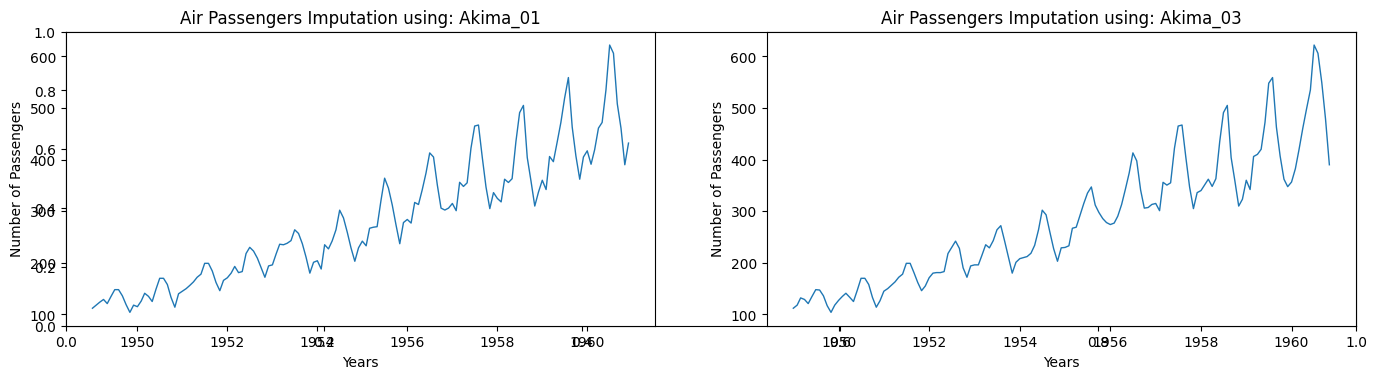

In [34]:
methods = ['Linear', 'Padding', 'Quadratic', 'Polynomial', 'PiecewisePolynomial', 'Spline', 'Pchip', 'Akima'] 
 

for method in methods:

    method_01 = method + "_01"
    method_03 = method + "_03"

    plt.subplots(figsize=(15, 5)) # figsize() function to adjust the size of function

    # 10% percentage
    plt.subplot(1, 2, 1)  # row 1, column 2, count 1 

    plt.plot(passenger["Date"], passenger[method_01], linewidth=1) 
    plt.title('Air Passengers Imputation using: ' + method_01) 
    plt.xlabel("Years") 
    plt.ylabel("Number of Passengers")

    # 30% percentage
    plt.subplot(1, 2, 2)  # row 1, column 2, count 1 

    plt.plot(passenger["Date"], passenger[method_03], linewidth=1) 
    plt.title('Air Passengers Imputation using: ' + method_03) 
    plt.xlabel("Years") 
    plt.ylabel("Number of Passengers") 

    # space between the plots
    plt.tight_layout(pad=4)

    plt.show()

All techniques yield results that are passably good. When the missing value window is narrow, these techniques have greater significance. It becomes more difficult to estimate them using these methods, though, if multiple consecutive data are missing.